# Flight price prediction

## Questions
a) Does price vary with Airlines?

b) How is the price affected when tickets are bought in just 1 or 2 days before departure?

c) Does ticket price change based on the departure time and arrival time?

d) How the price changes with change in Source and Destination?

e) How does the ticket price vary between Economy and Business class?

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [150]:
df_clean = pd.read_csv('./data/Clean_Dataset.csv')
df_business = pd.read_csv('./data/business.csv')
df_business['stop'] = df_business['stop'].str.replace(r'\s+', ' ', regex=True)
df_economy = pd.read_csv('./data/economy.csv')

In [151]:
df_clean

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [152]:
df_business

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop,23:55,Mumbai,"46,690"
...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,Vistara,UK,822,09:45,Chennai,10h 05m,1-stop,19:50,Hyderabad,"69,265"
93483,31-03-2022,Vistara,UK,826,12:30,Chennai,10h 25m,1-stop,22:55,Hyderabad,"77,105"
93484,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop,20:55,Hyderabad,"79,099"
93485,31-03-2022,Vistara,UK,828,07:00,Chennai,10h 00m,1-stop,17:00,Hyderabad,"81,585"


In [153]:
df_economy

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,832,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,826,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,822,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


## Removing useless data

In [154]:
# Checking for empty values ​​in table df_clean
df_clean.empty

False

In [155]:
# Removed Unnamed: 0 and flight from the df_clean
df_clean.drop(columns=['Unnamed: 0', 'flight'], inplace=True)

In [156]:
# Checking for empty values ​​in table df_business
df_business.empty

False

In [157]:
# Removed num_code from the df_business
df_business.drop(columns=['num_code'], inplace=True)

In [158]:
# Checking for empty values ​​in table df_economy
df_economy.empty

False

In [159]:
# Removed num_code from the df_economy
df_economy.drop(columns=['num_code'], inplace=True)

## Basic Statistics

### Clean dataset

In [160]:
# Printing the unique values ​​of individual columns
for col in df_clean.columns:
    if len(df_clean[col].unique()) > 50:
        print(f'{col}: {len(df_clean[col].unique())} unique values')
    else:
        print(f'{col}: {df_clean[col].unique()}')
    print()

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']

source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']

stops: ['zero' 'one' 'two_or_more']

arrival_time: ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']

destination_city: ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

class: ['Economy' 'Business']

duration: 476 unique values

days_left: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]

price: 12157 unique values



In [161]:
# Column statistics in df_clean
df_clean.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [162]:
# Schedule of individual airlines
df_clean['airline'].value_counts().to_frame()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


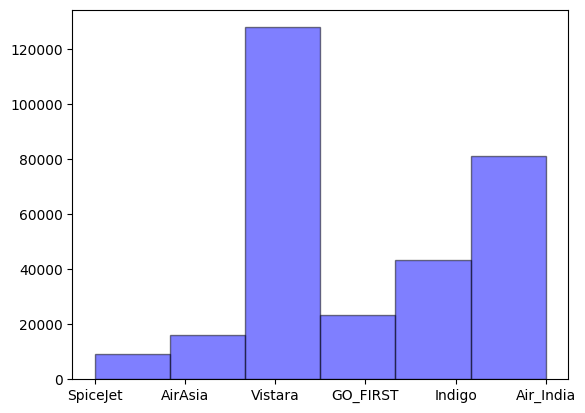

In [163]:
# Schedule of individual airline in the form of a histogram
plt.hist(df_clean['airline'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['airline'].unique()))
plt.show()

In [164]:
# Schedule of individual source city
df_clean['source_city'].value_counts().to_frame()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


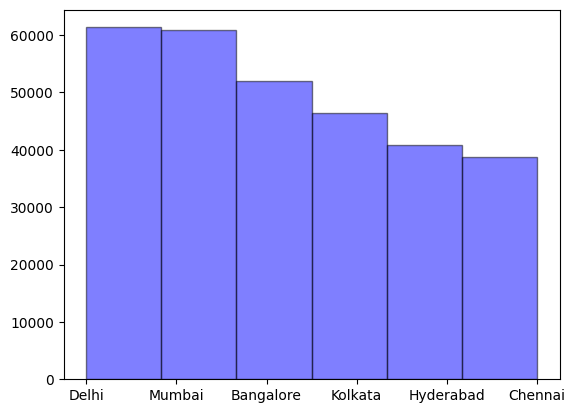

In [165]:
# Schedule of individual source_city in the form of a histogram
plt.hist(df_clean['source_city'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['source_city'].unique()))
plt.show()

In [166]:
# Schedule of individual departure time
df_clean['departure_time'].value_counts().to_frame()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


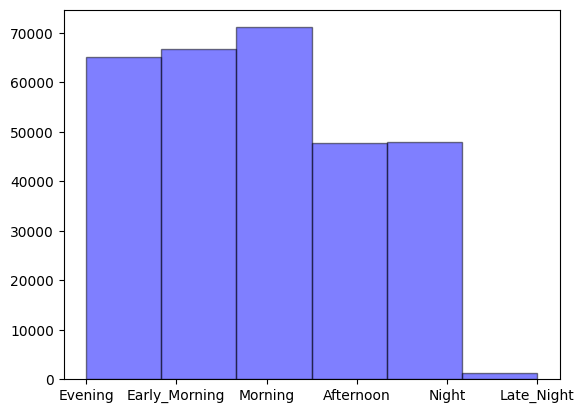

In [167]:
# Schedule of individual departure time in the form of a histogram
plt.hist(df_clean['departure_time'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['departure_time'].unique()))
plt.show()

In [168]:
# Schedule of individual stops
df_clean['stops'].value_counts().to_frame()

,count
stops,
one,250863
zero,36004
two_or_more,13286


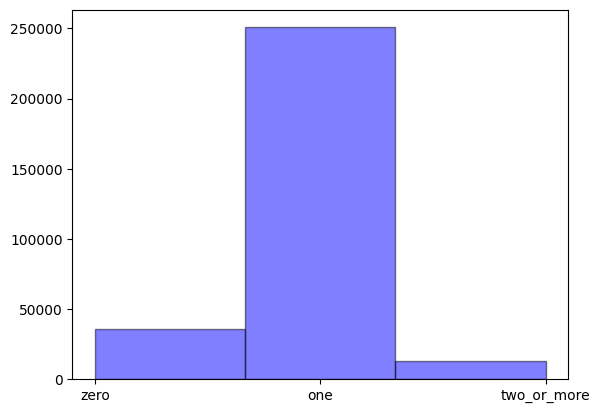

In [169]:
# Schedule of individual stops in the form of a histogram
plt.hist(df_clean['stops'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['stops'].unique()))
plt.show()

In [170]:
# Schedule of individual arrival time
df_clean['arrival_time'].value_counts().to_frame()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


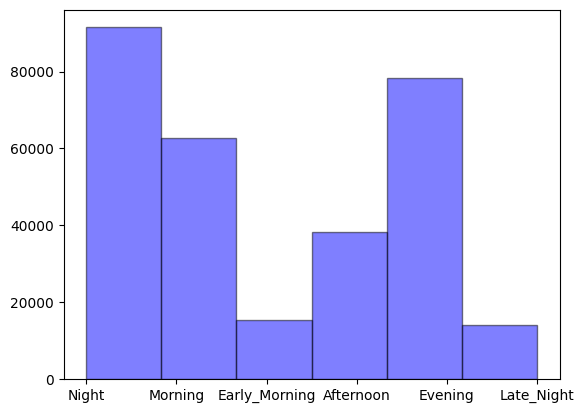

In [171]:
# Schedule of individual arrival times in the form of a histogram
plt.hist(df_clean['arrival_time'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['arrival_time'].unique()))
plt.show()

In [172]:
# Schedule of individual destination city
df_clean['destination_city'].value_counts().to_frame()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


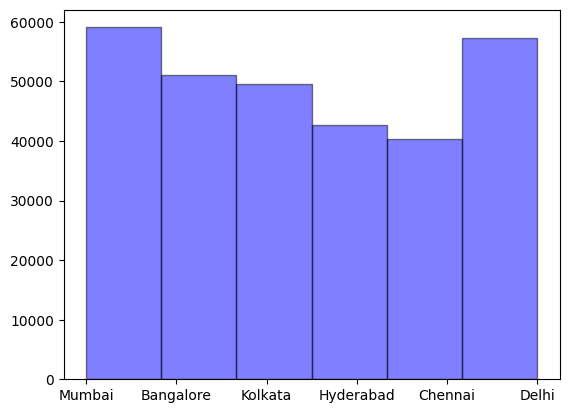

In [173]:
# Schedule of individual destination_city in the form of a histogram
plt.hist(df_clean['destination_city'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['destination_city'].unique()))
plt.show()

In [174]:
# Schedule of individual class
df_clean['class'].value_counts().to_frame()

,count
class,
Economy,206666
Business,93487


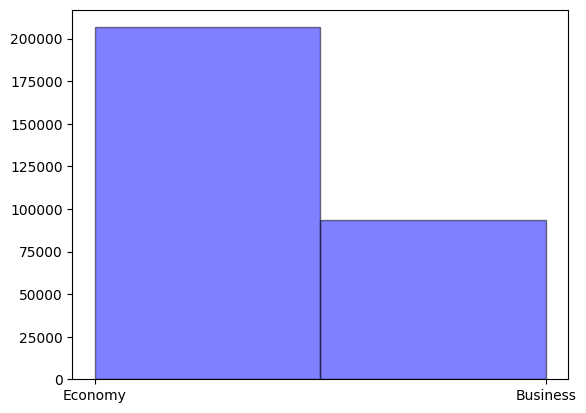

In [175]:
# Schedule of individual class in the form of a histogram
plt.hist(df_clean['class'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['class'].unique()))
plt.show()

In [176]:
# Schedule of individual class
df_clean['days_left'].value_counts().to_frame()

,count
days_left,
25,6633
18,6602
39,6593
32,6585
26,6573
24,6542
19,6537
31,6534
33,6532


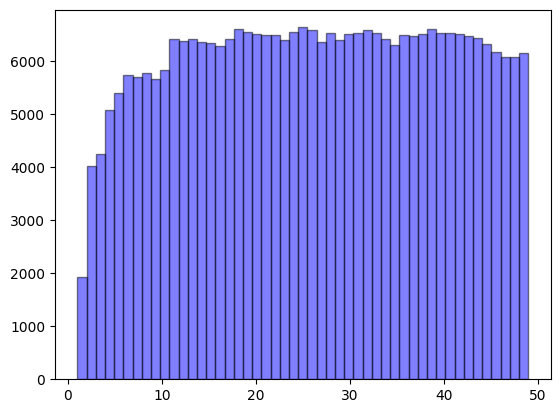

In [177]:
# Schedule of individual days_left in the form of a histogram
plt.hist(df_clean['days_left'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['days_left'].unique()))
plt.show()

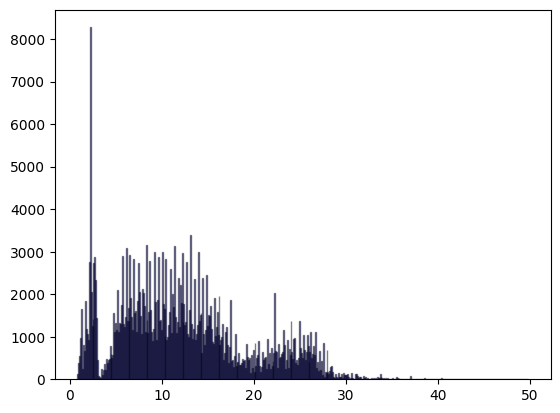

In [178]:
# Schedule of individual duration in the form of a histogram
plt.hist(df_clean['duration'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.5,
         bins=len(df_clean['duration'].unique()))
plt.show()

### Business dataset

In [179]:
# Printing the unique values ​​of individual columns in df_business
for col in df_business.columns:
    if len(df_business[col].unique()) > 50:
        print(f'{col}: {len(df_business[col].unique())} unique values')
    else:
        print(f'{col}: {df_business[col].unique()}')
    print()

date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']

airline: ['Air India' 'Vistara']

ch_code: ['AI' 'UK']

dep_time: 166 unique values

from: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

time_taken: 373 unique values

stop: ['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n

In [180]:
# Schedule of individual airlines
df_business['airline'].value_counts().to_frame()

,count
airline,
Vistara,60589
Air India,32898


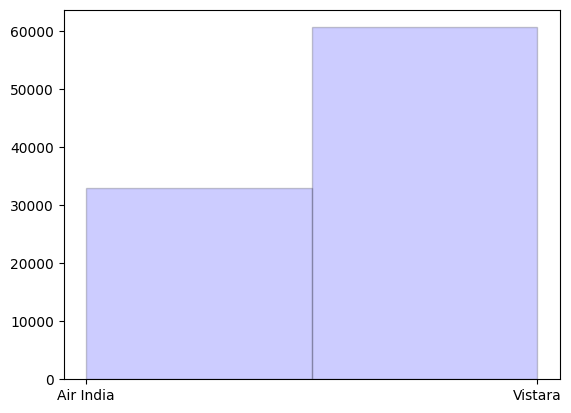

In [181]:
# Schedule of individual airline in the form of a histogram
plt.hist(df_business['airline'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['airline'].unique()))
plt.show()

In [182]:
# Schedule of individual airlines
df_business['ch_code'].value_counts().to_frame()

,count
ch_code,
UK,60589
AI,32898


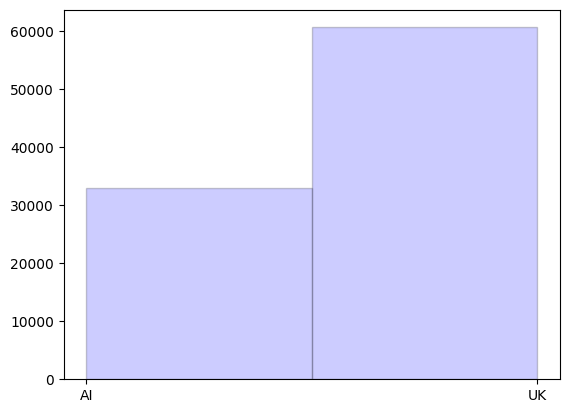

In [183]:
# Schedule of individual from in the form of a histogram
plt.hist(df_business['ch_code'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['ch_code'].unique()))
plt.show()

In [184]:
# Schedule of individual from
df_business['from'].value_counts().to_frame()

,count
from,
Mumbai,19858
Delhi,18316
Bangalore,16441
Kolkata,13473
Hyderabad,12870
Chennai,12529


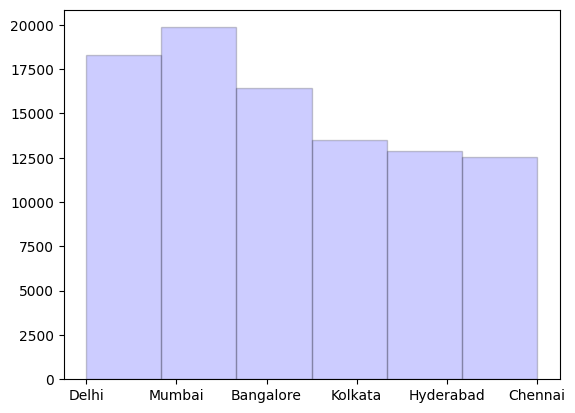

In [185]:
# Schedule of individual from in the form of a histogram
plt.hist(df_business['from'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['from'].unique()))
plt.show()

In [186]:
# Schedule of individual to
df_business['to'].value_counts().to_frame()

,count
to,
Mumbai,18991
Delhi,16707
Bangalore,16198
Kolkata,14758
Hyderabad,13675
Chennai,13158


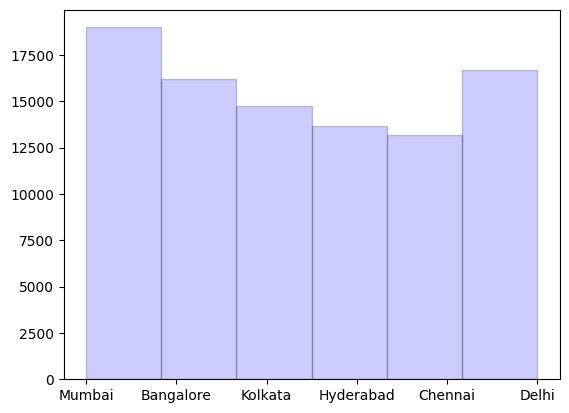

In [187]:
# Schedule of individual to in the form of a histogram
plt.hist(df_business['to'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.2,
         bins=len(df_business['to'].unique()))
plt.show()

### Economy dataset

In [188]:
# Printing the unique values ​​of individual columns in df_economy
for col in df_economy.columns:
    if len(df_economy[col].unique()) > 50:
        print(f'{col}: {len(df_economy[col].unique())} unique values')
    else:
        print(f'{col}: {df_economy[col].unique()}')
    print()

date: ['11-02-2022' '12-02-2022' '13-02-2022' '14-02-2022' '15-02-2022'
 '16-02-2022' '17-02-2022' '18-02-2022' '19-02-2022' '20-02-2022'
 '21-02-2022' '22-02-2022' '23-02-2022' '24-02-2022' '25-02-2022'
 '26-02-2022' '27-02-2022' '28-02-2022' '01-03-2022' '02-03-2022'
 '03-03-2022' '04-03-2022' '05-03-2022' '06-03-2022' '07-03-2022'
 '08-03-2022' '09-03-2022' '10-03-2022' '11-03-2022' '12-03-2022'
 '13-03-2022' '14-03-2022' '15-03-2022' '16-03-2022' '17-03-2022'
 '18-03-2022' '19-03-2022' '20-03-2022' '21-03-2022' '22-03-2022'
 '23-03-2022' '24-03-2022' '25-03-2022' '26-03-2022' '27-03-2022'
 '28-03-2022' '29-03-2022' '30-03-2022' '31-03-2022']

airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO FIRST' 'Indigo' 'Air India' 'Trujet'
 'StarAir']

ch_code: ['SG' 'I5' 'UK' 'G8' '6E' 'AI' '2T' 'S5']

dep_time: 251 unique values

from: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

time_taken: 483 unique values

stop: ['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t

In [189]:
# Schedule of individual airlines
df_economy['airline'].value_counts().to_frame()

,count
airline,
Vistara,67270
Air India,47996
Indigo,43120
GO FIRST,23177
AirAsia,16098
SpiceJet,9011
StarAir,61
Trujet,41


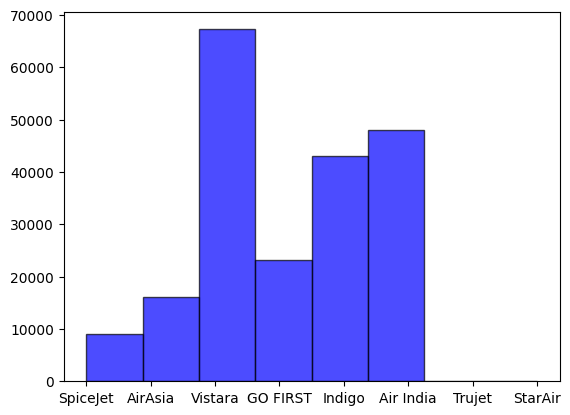

In [190]:
# Schedule of individual airline in the form of a histogram
plt.hist(df_economy['airline'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['airline'].unique()))
plt.show()

In [191]:
# Schedule of individual ch_code
df_economy['ch_code'].value_counts().to_frame()

,count
ch_code,
UK,67270
AI,47996
6E,43120
G8,23177
I5,16098
SG,9011
S5,61
2T,41


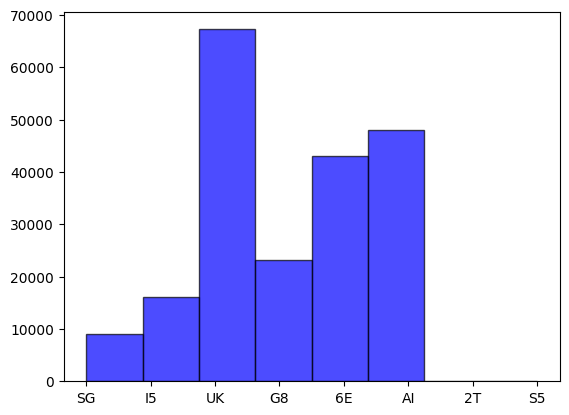

In [192]:
# Schedule of individual ch_code in the form of a histogram
plt.hist(df_economy['ch_code'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['ch_code'].unique()))
plt.show()

In [193]:
# Schedule of individual from
df_economy['from'].value_counts().to_frame()

,count
from,
Delhi,43029
Mumbai,41045
Bangalore,35665
Kolkata,32874
Hyderabad,27990
Chennai,26171


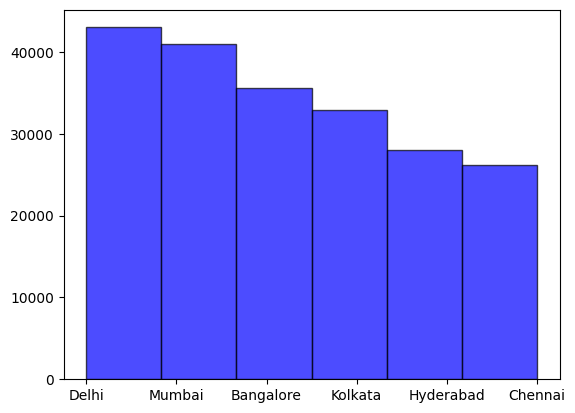

In [194]:
# Schedule of individual from in the form of a histogram
plt.hist(df_economy['from'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['from'].unique()))
plt.show()

In [195]:
# Schedule of individual to
df_economy['to'].value_counts().to_frame()

,count
to,
Delhi,40654
Mumbai,40118
Bangalore,34914
Kolkata,34777
Hyderabad,29101
Chennai,27210


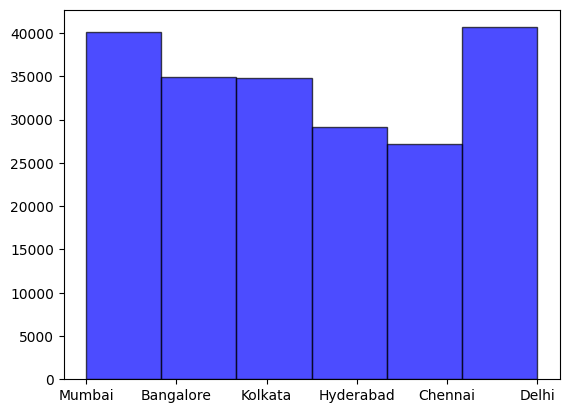

In [196]:
# Schedule of individual to in the form of a histogram
plt.hist(df_economy['to'],
         density=False,
         histtype='bar',
         color='b',
         edgecolor='k',
         alpha=0.7,
         bins=len(df_economy['to'].unique()))
plt.show()

## Missing and duplicates values

In [46]:
# Checking if there are duplicates in table df_clean
df_clean.duplicated().any()

False

In [198]:
df_clean.drop_duplicates()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [199]:
# Checking if there are duplicates in table df_business
df_business.duplicated().any()

False

In [200]:
# Checking if there are duplicates in table df_economy
df_economy.duplicated().any()

True

In [201]:
# Removing duplicates in df_economy (2)
df_economy.drop_duplicates()

,date,airline,ch_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"
...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,697"
206770,31-03-2022,Vistara,UK,07:05,Chennai,13h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:55,Hyderabad,"7,709"
206771,31-03-2022,Vistara,UK,12:30,Chennai,20h 35m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"
206772,31-03-2022,Vistara,UK,09:45,Chennai,23h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,09:05,Hyderabad,"8,640"


## Standardise and normalize data

## Encoding categorical variables

In [50]:
df_clean_encoded = pd.get_dummies(df_clean, columns=['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class'], dtype=int)
df_clean_encoded

,Unnamed: 0,flight,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_time_Morning,arrival_time_Night,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Business,class_Economy
0,0,SG-8709,2.17,1,5953,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,1
1,1,SG-8157,2.33,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,1
2,2,I5-764,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,3,UK-995,2.25,1,5955,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,4,UK-963,2.33,1,5955,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,UK-822,10.08,49,69265,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
300149,300149,UK-826,10.42,49,77105,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
300150,300150,UK-832,13.83,49,79099,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
300151,300151,UK-828,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [51]:
df_business_encoded = pd.get_dummies(df_business, columns=['airline', 'ch_code', 'from', 'stop', 'to'], dtype=int)
df_business_encoded

,date,num_code,dep_time,time_taken,arr_time,price,airline_Air India,airline_Vistara,ch_code_AI,ch_code_UK,...,stop_1-stop Via Surat,stop_1-stop Via VTZ,stop_2+-stop,stop_non-stop,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,868,18:00,02h 00m,20:00,"25,612",1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,11-02-2022,624,19:00,02h 15m,21:15,"25,612",1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,11-02-2022,531,20:00,24h 45m,20:45,"42,220",1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,11-02-2022,839,21:25,26h 30m,23:55,"44,450",1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,11-02-2022,544,17:15,06h 40m,23:55,"46,690",1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93482,31-03-2022,822,09:45,10h 05m,19:50,"69,265",0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
93483,31-03-2022,826,12:30,10h 25m,22:55,"77,105",0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
93484,31-03-2022,832,07:05,13h 50m,20:55,"79,099",0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
93485,31-03-2022,828,07:00,10h 00m,17:00,"81,585",0,1,0,1,...,0,0,0,0,0,0,0,1,0,0


In [52]:
df_economy_encoded = pd.get_dummies(df_economy, columns=['airline', 'ch_code', 'from', 'stop', 'to'], dtype=int)
df_economy_encoded

,date,num_code,dep_time,time_taken,arr_time,price,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,...,stop_1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t,stop_1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t,stop_2+-stop,stop_non-stop,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,11-02-2022,8709,18:55,02h 10m,21:05,"5,953",0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,11-02-2022,8157,06:20,02h 20m,08:40,"5,953",0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,11-02-2022,764,04:25,02h 10m,06:35,"5,956",0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,11-02-2022,995,10:20,02h 15m,12:35,"5,955",0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,11-02-2022,963,08:50,02h 20m,11:10,"5,955",0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206769,31-03-2022,832,07:05,13h 50m,20:55,"7,697",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206770,31-03-2022,832,07:05,13h 50m,20:55,"7,709",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206771,31-03-2022,826,12:30,20h 35m,09:05,"8,640",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
206772,31-03-2022,822,09:45,23h 20m,09:05,"8,640",0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Outlier data

### Removing

### Transforming

## Data visualization

### Name of feature1 [chart/hist/dot etc...]

### Name of feature2 [chart/hist/dot etc...]

.

.

.

### Name of featureN [chart/hist/dot etc...]

## Varble effect on the outcome

### Categorical

### Numerical

## Developing new features

## Selecting most important features [not necessary]